# Rule based and lexicon based methods

## Using VADER (Valence Aware Dictionary and sentiment Reasoner)

In [1]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s 


***Make sure you are set to handle UTF-8 encoding in your terminal or IDE***

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
vader_obj = SentimentIntensityAnalyzer()

In [4]:
vader_obj.polarity_scores('I do not like Amazon')

{'compound': -0.3875, 'neg': 0.547, 'neu': 0.453, 'pos': 0.0}

[Read about scoring](https://github.com/cjhutto/vaderSentiment#python-demo-and-code-examples)


[How compound score is calculated](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk)

In [5]:
vader_obj.polarity_scores('I am :)')

{'compound': 0.4588, 'neg': 0.0, 'neu': 0.4, 'pos': 0.6}

In [6]:
vader_obj.polarity_scores('Your service has never been good')

{'compound': -0.3412, 'neg': 0.325, 'neu': 0.675, 'pos': 0.0}

In [7]:
vader_obj.polarity_scores('I hate flowers')

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

In [ ]:
vader_obj.polarity_scores('The product was not bad')

{'compound': 0.431, 'neg': 0.0, 'neu': 0.584, 'pos': 0.416}

In [ ]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

In [ ]:
for sentence in sentences:
  vader_score = vader_obj.polarity_scores(sentence)
  print(f'{sentence} {"-"*20} {vader_score}')

VADER is smart, handsome, and funny. -------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny! -------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny. -------------------- {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY. -------------------- {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!! -------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!! -------------------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny. -------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good. -------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
At least it isn't a horr

## Using Afinn

In [8]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=5da80d25ff3072e255b450c7f9d1ecacbc47436c116402627a2a9344cc62c3d0
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [9]:
from afinn import Afinn
afn = Afinn()

In [10]:
afn_score = afn.score('I do not like Amazon')
afn_score

2.0

In [16]:
def afinn_sentiment_score(text_str):
  """
  Desc: Sentiment score based on afinn lib

  Arg:
    text_str (String) - single string value

  Return:
    (Sting) - "Positive" if score > 0,
              "Negative" if score < 0, 
              else "Neutral"
  """
  afn_score = afn.score(text_str)
  if (afn_score > 0):
    return 'Positive ' + str(afn_score)
  elif (afn_score < 0):
    return 'Negative ' + str(afn_score)
  else:
    return 'Neutral ' + str(afn_score)

In [17]:
afinn_sentiment_score('I am :)')

'Neutral 0.0'

In [18]:
afinn_sentiment_score('Your service has never been good')

'Positive 3.0'

In [19]:
afinn_sentiment_score('Your service has never been better')

'Positive 2.0'

In [20]:
afinn_sentiment_score('I HATE FLOWERS')

'Negative -3.0'

In [21]:
afinn_sentiment_score('The product was not bad')

'Negative -3.0'

## Using text blob for sentiment analysis

In [22]:
!pip install -U textblob
!python -m textblob.download_corpora

     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [23]:
from textblob import TextBlob

To do any kind of text processing using TextBlob, we need to follow two steps listed below:
*   Convert any string to TextBlob object.  [TextBlobs Are Like Python Strings!](https://textblob.readthedocs.io/en/dev/quickstart.html#textblobs-are-like-python-strings)
*   Call functions of TextBlob to do a specific task

In [24]:
blob_obj = TextBlob('I do not like Amazon')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.0, subjectivity=0.0)

In [25]:
blob_obj = TextBlob('I am :)')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.5, subjectivity=1.0)

In [26]:
blob_obj = TextBlob('The product was not bad')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)

In [27]:
blob_obj = TextBlob('I hate flowers')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=-0.8, subjectivity=0.9)

In [28]:
blob_obj = TextBlob('Your service has never been good')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [29]:
# Only polarity score
polarity_score = TextBlob('Your service has never been good').polarity
polarity_score

0.7

In [4]:
# Only subjectivity score
subjectivity_score = TextBlob('Your service has never been good').subjectivity
subjectivity_score

NameError: ignored

## NLTK Method (WordNet & SentiWordNet) based

In [2]:
!pip install -U nltk
import nltk
nltk.download('all') # Use this for everything. Then next 2 lines are not required
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [3]:
# Check similar meaning words and different usage as per language 
list(swn.senti_synsets('hate'))

[SentiSynset('hate.n.01'), SentiSynset('hate.v.01')]

Here `hate` can be `Noun` -> **She looked at him with eyes full of hate** \
or `hate` can be a `Verb` -> **I hate the smell of cigarettes**

In [5]:
from nltk.tag import pos_tag
token = nltk.word_tokenize('She looked at him with eyes full of hate')
after_tagging = nltk.pos_tag(token)
after_tagging

[('She', 'PRP'),
 ('looked', 'VBD'),
 ('at', 'IN'),
 ('him', 'PRP'),
 ('with', 'IN'),
 ('eyes', 'NNS'),
 ('full', 'JJ'),
 ('of', 'IN'),
 ('hate', 'NN')]

**She said its not good to `hate` some one** - This can be classified as 'neg'

In [6]:
token = nltk.word_tokenize('I hate the smell of cigarettes')
after_tagging = nltk.pos_tag(token)
after_tagging

[('I', 'PRP'),
 ('hate', 'VBP'),
 ('the', 'DT'),
 ('smell', 'NN'),
 ('of', 'IN'),
 ('cigarettes', 'NNS')]

In [7]:
polarity_words= swn.senti_synsets('hate')
words = list(polarity_words)

for word in words:
  print(f'Type: {word},\n\
  Postive score: {word.pos_score()},\n\
  Negative score: {word.neg_score()},\n\
  Objectivity score: {word.obj_score()}', '\n')

Type: <hate.n.01: PosScore=0.125 NegScore=0.375>,
  Postive score: 0.125,
  Negative score: 0.375,
  Objectivity score: 0.5 

Type: <hate.v.01: PosScore=0.0 NegScore=0.75>,
  Postive score: 0.0,
  Negative score: 0.75,
  Objectivity score: 0.25 



The Sentiment of the sentence as a whole is determined by obtaining the difference between the postive and negative scores of the contextual tokens/words that use SentiWordNet to calculate the polarity.

https://nlpforhackers.io/sentiment-analysis-intro/

# Machine learning based methods (Simple ML or DL models or pre-trained deep NN language models)

## Working with NLTK and Scikit learn

In [87]:
################ Issues for students to solve #######################

import pandas as pd
import os

In [88]:
os.chdir('/content/')

In [89]:
tweets_raw = pd.read_csv('Tweets.csv.zip')
tweets_raw.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [90]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [91]:
tweets_data = tweets_raw[['text', 'airline_sentiment']]
tweets_data.head(2)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive


In [92]:
tweets_raw['text'][100]

'@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM'

In [93]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [94]:
tweets_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [95]:
tweets_data = tweets_data[tweets_data['airline_sentiment'] != 'neutral']
tweets_data['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

#### Before the Analysis data visualization

In [96]:
# Cufflinks is a very useful add-on to plot figures directly from the dataframe series object
!pip install cufflinks

import cufflinks as cf

cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [97]:
configure_plotly_browser_state()
tweets_raw['airline_sentiment'].iplot(kind='hist', bins=20, xTitle='polarity', linecolor='black', yTitle='count', title='Sentiment Polarity Distribution')

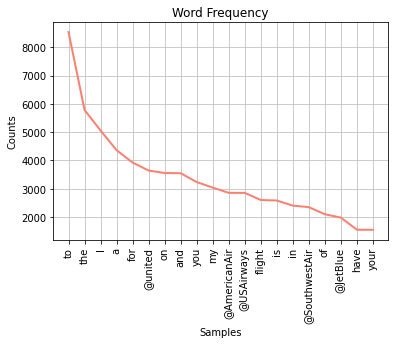

In [98]:
# Nltk word frequency
all_words=[]        
for i in range(len(tweets_raw['text'])):
    all_words += tweets_raw['text'][i].split()

#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

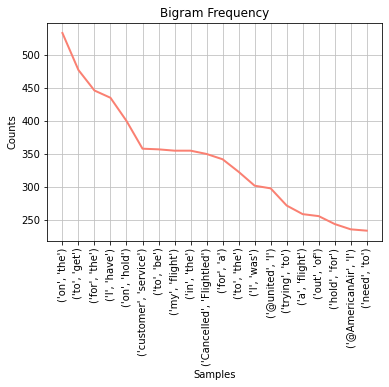

In [99]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [100]:
import nltk
from nltk.collocations import *
bigram= nltk.collocations.BigramAssocMeasures()
Collocation = BigramCollocationFinder.from_words(all_words)
Collocation.nbest(bigram.pmi, 10)

[('"#flt', '755'),
 ('".', 'Dunno?!'),
 ('"Active', 'Military"'),
 ('"Airserv"', 'contractors'),
 ('"Best', 'Fare'),
 ('"Breaking', 'Barriers'),
 ('"Cabin', 'Functionality"'),
 ('"Considering?"', '#Accessibility'),
 ('"Customer', 'Experience"'),
 ('"Dear', 'Ted.')]

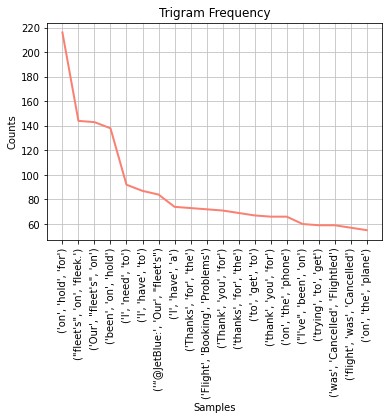

In [101]:
#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency')

In [102]:
import nltk
from nltk.collocations import *
trigram= nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(all_words)
finder.nbest(trigram.pmi, 10)

[('"Best', 'Fare', 'Finder"'),
 ('"Customer', 'Experience"', 'executive.'),
 ('"No"', '"Y', 'not"'),
 ('"United', 'Breaks', 'Guitars"'),
 ('"Y', 'not"', '"bc'),
 ('"booked', '"#flt', '755'),
 ('"flyers', "right's", 'booklet"'),
 ('"white', 'revive"', 'laundry'),
 ('"{{header.elevateUser.numOfPointsAvailable', '||', "'0'"),
 ('#1623', 'sjo-iad.', 'Handed')]

In [103]:
# Word cloud
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [104]:
wordcloud_before = WordCloud().generate(' '.join(tweets_raw['text']))

**Try passing stopwords ->** `WordCloud(stopwords=STOPWORDS)`

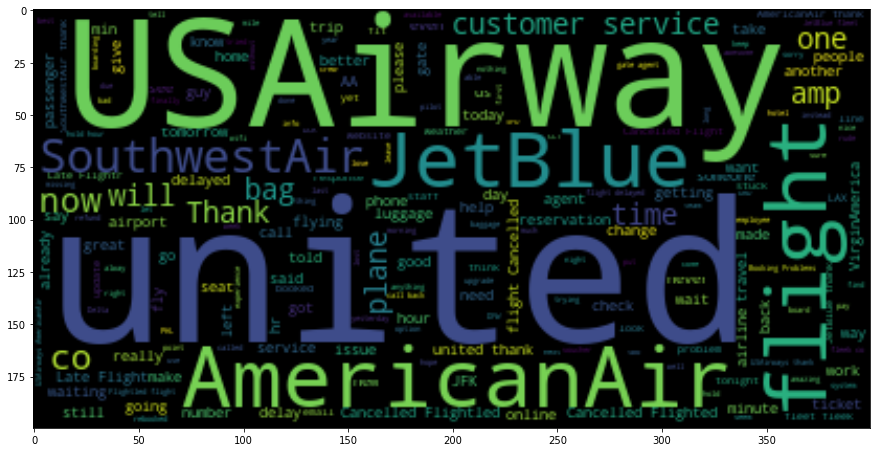

In [105]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_before, interpolation='bilinear')

#### Data prep

In [106]:
################ Issues for students to solve #######################
tweets_data.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [107]:
tweets_data.reset_index(inplace=True, drop=True)
tweets_data.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [108]:
## Data cleaning starts here

# Lower case all
tweets_data['text_lower'] = tweets_data['text'].str.lower()
print(f"Before ---- {tweets_data['text'].iloc[0]}\nAfter ---- {tweets_data['text_lower'].iloc[0]}")

Before ---- @VirginAmerica plus you've added commercials to the experience... tacky.
After ---- @virginamerica plus you've added commercials to the experience... tacky.


In [109]:
## Install emot
!pip install emot
import emot
emot_obj = emot.core.emot()

# Can check from here how it is defined (Old)
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS

# Can check from here how it is defined (New)
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [110]:
### Detect emoji ###
def detect_emoji(text):
  if emot_obj.emoji(text)['flag']:
    return 1
  else:
    return 0

tweets_data["text_emoji_Y/N_before"] = tweets_data["text_lower"].apply(lambda text: detect_emoji(text))
print(f"No of tweets with emoji: {tweets_data['text_emoji_Y/N_before'].sum()}")

No of tweets with emoji: 364


In [111]:
## Show top 10 text with emoji's
list(tweets_data[tweets_data["text_emoji_Y/N_before"] == 1]["text"])[:10]

['I ❤️ flying @VirginAmerica. ☺️👍',
 '@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet',
 "@VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢",
 '@VirginAmerica Moodlighting is the only way to fly! Best experience EVER! Cool and calming. 💜✈ #MoodlitMonday',
 "@VirginAmerica @ladygaga @carrieunderwood  I'm Lady Gaga!!! She is amazing! 😊",
 "@VirginAmerica - amazing customer  service, again! 💕💕 RaeAnn in SF - she's the best! #customerservice #virginamerica #flying",
 '@VirginAmerica Have a great week 🌞✈',
 '😎 RT @VirginAmerica: You’ve met your match. Got status on another airline? Upgrade (+restr): http://t.co/RHKaMx9VF5. http://t.co/PYalebgkJt',
 '@VirginAmerica trying to book a flight &amp; your site is down 😁',
 '@VirginAmerica my goodness your people @love field are amazing under pressure ❤

In [112]:
UNICODE_EMOJI.items()

dict_items([('🥇', ':1st_place_medal:'), ('🥈', ':2nd_place_medal:'), ('🥉', ':3rd_place_medal:'), ('🆎', ':AB_button_(blood_type):'), ('🏧', ':ATM_sign:'), ('🅰', ':A_button_(blood_type):'), ('🇦🇫', ':Afghanistan:'), ('🇦🇱', ':Albania:'), ('🇩🇿', ':Algeria:'), ('🇦🇸', ':American_Samoa:'), ('🇦🇩', ':Andorra:'), ('🇦🇴', ':Angola:'), ('🇦🇮', ':Anguilla:'), ('🇦🇶', ':Antarctica:'), ('🇦🇬', ':Antigua_&_Barbuda:'), ('♒', ':Aquarius:'), ('🇦🇷', ':Argentina:'), ('♈', ':Aries:'), ('🇦🇲', ':Armenia:'), ('🇦🇼', ':Aruba:'), ('🇦🇨', ':Ascension_Island:'), ('🇦🇺', ':Australia:'), ('🇦🇹', ':Austria:'), ('🇦🇿', ':Azerbaijan:'), ('🔙', ':BACK_arrow:'), ('🅱', ':B_button_(blood_type):'), ('🇧🇸', ':Bahamas:'), ('🇧🇭', ':Bahrain:'), ('🇧🇩', ':Bangladesh:'), ('🇧🇧', ':Barbados:'), ('🇧🇾', ':Belarus:'), ('🇧🇪', ':Belgium:'), ('🇧🇿', ':Belize:'), ('🇧🇯', ':Benin:'), ('🇧🇲', ':Bermuda:'), ('🇧🇹', ':Bhutan:'), ('🇧🇴', ':Bolivia:'), ('🇧🇦', ':Bosnia_&_Herzegovina:'), ('🇧🇼', ':Botswana:'), ('🇧🇻', ':Bouvet_Island:'), ('🇧🇷', ':Brazil:'), ('🇮🇴', ':B

In [113]:
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, " "+UNICODE_EMOJI[emot]+" ")
    return text

tweets_data["text_NoEmoji"] = tweets_data["text_lower"].apply(lambda text: convert_emojis(text))

In [114]:
### Detect emoji ### Recheck 
def detect_emoji(text):
  if emot_obj.emoji(text)['flag']:
    return 1
  else:
    return 0

tweets_data["text_emoji_Y/N_after"] = tweets_data["text_NoEmoji"].apply(lambda text: detect_emoji(text))
print(f"No of tweets with emoji: {tweets_data['text_emoji_Y/N_after'].sum()}")

No of tweets with emoji: 0


In [115]:
## A quick check to text_NoEmoji where text_emoji_Y/N_before was TRUE
list(tweets_data[tweets_data["text_emoji_Y/N_before"] == 1]["text_NoEmoji"])[:]

['i  :red_heart: ️ flying @virginamerica.  :smiling_face: ️ :thumbs_up: ',
 '@virginamerica you guys messed up my seating.. i reserved seating with my friends and you guys gave my seat away ...  :pouting_face:  i want free internet',
 "@virginamerica hi! i just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during flight booking problems  :crying_face: ",
 '@virginamerica moodlighting is the only way to fly! best experience ever! cool and calming.  :purple_heart:  :airplane:  #moodlitmonday',
 "@virginamerica @ladygaga @carrieunderwood  i'm lady gaga!!! she is amazing!  :smiling_face_with_smiling_eyes: ",
 "@virginamerica - amazing customer  service, again!  :two_hearts:  :two_hearts:  raeann in sf - she's the best! #customerservice #virginamerica #flying",
 '@virginamerica have a great week  :sun_with_face:  :airplane: ',
 ' :smiling_face_with_sunglasses:  rt @virginamerica: you’ve met your match. got status on another airline? upgrad

In [116]:
## Just wanted to check one more lib to see if i get the same 364 tweets with the emoji's
!pip install emoji
import emoji

In [117]:
emoji.demojize("💕💕 adfksnfsf 🌞 hey oyou this's is 😎😎😁 :)) ")

":two_hearts::two_hearts: adfksnfsf :sun_with_face: hey oyou this's is :smiling_face_with_sunglasses::smiling_face_with_sunglasses::beaming_face_with_smiling_eyes: :)) "

In [118]:
emoji.demojize("UIss s ss ")

'UIss s ss '

In [119]:
def emoji_lib_check(orignal_text):
  new_text = emoji.demojize(orignal_text)
  if new_text == orignal_text:
    return "No changes made"
  else:
    return "Found emoji"

tweets_data["emoji_lib_check"] = tweets_data["text"].apply(lambda text: emoji_lib_check(text))
tweets_data["emoji_lib_check"].value_counts()

No changes made    11177
Found emoji          364
Name: emoji_lib_check, dtype: int64

In [120]:
## So our lib is ok.

In [121]:
### Detect emoticons ###
def detect_emoticons(text):
  try:
    if emot_obj.emoticons(text)['flag']:
      return 1
    if not emot_obj.emoticons(text)['flag']:
      return 0
  except:
    return -1

tweets_data["text_emoticons_Y/N_before"] = tweets_data["text_NoEmoji"].apply(lambda text: detect_emoticons(text))
tweets_data["text_emoticons_Y/N_before"].value_counts()

0    10417
1     1124
Name: text_emoticons_Y/N_before, dtype: int64

In [122]:
## 0 - Text without emoticons (10417)
## 1 - Valid text with emoticons (1124)

## Need to check all of them.

In [123]:
# Check results where emot thinks emoticons are not present (Total 7962)
list(tweets_data[tweets_data["text_emoticons_Y/N_before"] == 0]['text_NoEmoji'])[:10]

["@virginamerica plus you've added commercials to the experience... tacky.",
 '@virginamerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@virginamerica and it's a really big bad thing about it",
 "@virginamerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va",
 "@virginamerica well, i didn't…but now i do! :-d",
 "@virginamerica it was amazing, and arrived an hour early. you're too good to me.",
 '@virginamerica i &lt;3 pretty graphics. so much better than minimal iconography. :d',
 "@virginamerica this is such a great deal! already thinking about my 2nd trip to @australia &amp; i haven't even gone on my 1st trip yet! ;p",
 '@virginamerica thanks!',
 '@virginamerica sfo-pdx schedule is still mia.']

In [124]:
## Check results where emot thinks emoticons are present (Total 801)
list(tweets_data[tweets_data["text_emoticons_Y/N_before"] == 1]['text_NoEmoji'])

['@virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :)',
 "@virginamerica @virginmedia i'm flying your #fabulous #seductive skies again! u take all the #stress away from travel http://t.co/ahlxhhkiyn",
 '@virginamerica i love this graphic. http://t.co/ut5grrwaaa',
 "@virginamerica hi! i just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during flight booking problems  :crying_face: ",
 '@virginamerica awaiting my return phone call, just would prefer to use your online self-service option :(',
 '@virginamerica this is great news!  america could start flights to hawaii by end of year http://t.co/r8p2zy3fe4 via @pacificbiznews',
 '@virginamerica your chat support is not working on your site: http://t.co/vhp2gtdwpk',
 '@virginamerica view of downtown los angeles, the hollywood sign, and beyond that rain in the mountains! http://t.co/dw5nf0ibtr',
 '@virginamerica heyyyy guyyyys.. been trying to get through for an

In [125]:
## Everythinh looks good but
## emot is detecting ":/" in http:/ as an emoticon
emot_obj.emoticons("@VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #pleasecomeback http://t.co/gLXFwP6nQH")

{'flag': True,
 'location': [[112, 114]],
 'mean': ['Skeptical, annoyed, undecided, uneasy or hesitant'],
 'value': [':/']}

In [126]:
## Maybe i need to remove these http things first.

In [127]:
# Remove URLS
import re

def remove_urls(text):
  url_pattern = re.compile(r'http\S+', flags=re.M)
  return url_pattern.sub("", text)

tweets_data["text_without_URLS"] = tweets_data["text_NoEmoji"].apply(lambda text: remove_urls(text))

In [128]:
### Detect emoticons ### Recheck after removal of URLs
def detect_emoticons(text):
  try:
    if emot_obj.emoticons(text)['flag']:
      return 1
    if not emot_obj.emoticons(text)['flag']:
      return 0
  except:
    return -1

tweets_data["text_emoticons_Y/N_before"] = tweets_data["text_without_URLS"].apply(lambda text: detect_emoticons(text))
tweets_data["text_emoticons_Y/N_before"].value_counts()

0    11069
1      472
Name: text_emoticons_Y/N_before, dtype: int64

In [129]:
## 0 - Text without emoticons increased from (10417) -> (11069)
## 1 - Valid text with emoticons decreased from from (1124) -> (472)

## Need to check all of them (Again)

In [130]:
# Check results where emot thinks emoticons are not present (Total 8449)
list(tweets_data[tweets_data["text_emoticons_Y/N_before"] == 0]['text_without_URLS'])[:10]

["@virginamerica plus you've added commercials to the experience... tacky.",
 '@virginamerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@virginamerica and it's a really big bad thing about it",
 "@virginamerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va",
 "@virginamerica well, i didn't…but now i do! :-d",
 "@virginamerica it was amazing, and arrived an hour early. you're too good to me.",
 '@virginamerica i &lt;3 pretty graphics. so much better than minimal iconography. :d',
 "@virginamerica this is such a great deal! already thinking about my 2nd trip to @australia &amp; i haven't even gone on my 1st trip yet! ;p",
 "@virginamerica @virginmedia i'm flying your #fabulous #seductive skies again! u take all the #stress away from travel ",
 '@virginamerica thanks!']

In [131]:
## Check results where emot thinks emoticons are present (Total 342)
list(tweets_data[tweets_data["text_emoticons_Y/N_before"] == 1]['text_without_URLS'])

['@virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :)',
 "@virginamerica hi! i just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during flight booking problems  :crying_face: ",
 '@virginamerica awaiting my return phone call, just would prefer to use your online self-service option :(',
 '@virginamerica heyyyy guyyyys.. been trying to get through for an hour. can someone call me please? :/',
 "@virginamerica you're the best!! whenever i (begrudgingly) use any other airline i'm delayed and late flight :(",
 '@virginamerica i paid the premium to fly you across the country, you cancelled flight my flight and offer no check fee or upgrade love? sad face :(',
 "@virginamerica why don't any of the pairings include red wine?! only white is offered :( #redwineisbetter",
 '@virginamerica trying to book a flight &amp; your site is down  :beaming_face_with_smiling_eyes: ',
 '@virginamerica done! thank you for the qui

In [132]:
"""def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
    return text

tweets_data["text_NoEmoticons"] = tweets_data["text_without_URLS"].apply(lambda text: convert_emoticons(text))"""

'def convert_emoticons(text):\n    for emot in EMOTICONS_EMO:\n        text = re.sub(u\'(\'+emot+\')\', "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)\n    return text\n\ntweets_data["text_NoEmoticons"] = tweets_data["text_without_URLS"].apply(lambda text: convert_emoticons(text))'

In [133]:
"""def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(u'('+emot+')', " "+("_".join(EMOTICONS_EMO[emot].replace(",","").split()))+" ", text)
    return text

tweets_data["text_NoEmoticons"] = tweets_data["text_without_URLS"].apply(lambda text: convert_emoticons(text))"""

'def convert_emoticons(text):\n    for emot in EMOTICONS_EMO:\n        text = re.sub(u\'(\'+emot+\')\', " "+("_".join(EMOTICONS_EMO[emot].replace(",","").split()))+" ", text)\n    return text\n\ntweets_data["text_NoEmoticons"] = tweets_data["text_without_URLS"].apply(lambda text: convert_emoticons(text))'

In [134]:
"""### Detect emoticons ### Recheck after removal of URLs
def detect_emoticons(text):
  try:
    if emot_obj.emoticons(text)['flag']:
      return 1
    if not emot_obj.emoticons(text)['flag']:
      return 0
  except:
    return 0

tweets_data["text_emoticons_Y/N_after"] = tweets_data["text_NoEmoticons"].apply(lambda text: detect_emoticons(text))
tweets_data["text_emoticons_Y/N_after"].value_counts()"""

'### Detect emoticons ### Recheck after removal of URLs\ndef detect_emoticons(text):\n  try:\n    if emot_obj.emoticons(text)[\'flag\']:\n      return 1\n    if not emot_obj.emoticons(text)[\'flag\']:\n      return 0\n  except:\n    return 0\n\ntweets_data["text_emoticons_Y/N_after"] = tweets_data["text_NoEmoticons"].apply(lambda text: detect_emoticons(text))\ntweets_data["text_emoticons_Y/N_after"].value_counts()'

In [ ]:
## Continue rest of the work

In [135]:
# Remove Punctuation
import string

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

tweets_data["text_wo_punct"] = tweets_data["text_without_URLS"].apply(lambda text: remove_punctuation(text))

print(f"Before ---- {tweets_data['text_without_URLS'].iloc[0]}\nAfter ---- {tweets_data['text_wo_punct'].iloc[0]}")

Before ---- @virginamerica plus you've added commercials to the experience... tacky.
After ---- virginamerica plus youve added commercials to the experience tacky


In [136]:
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

About [text.translate](https://www.programiz.com/python-programming/methods/string/translate) & [mkestrans](https://www.w3schools.com/python/ref_string_maketrans.asp)

In [137]:
# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweets_data["text_wo_stop"] = tweets_data["text_wo_punct"].apply(lambda text: remove_stopwords(text))

print(f"Before ---- {tweets_data['text_wo_punct'].iloc[0]}\nAfter ---- {tweets_data['text_wo_stop'].iloc[0]}")

Before ---- virginamerica plus youve added commercials to the experience tacky
After ---- virginamerica plus youve added commercials experience tacky


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
## Remove numbers or any other no Alphabet
## my_string.isalpha(), my_string.isdigit(), my_string.isalnum()

def remove_digits(text):
    return " ".join([word for word in text.split() if not word.isdigit()])

tweets_data["text_wo_digits"] = tweets_data["text_wo_stop"].apply(lambda text: remove_digits(text))

print(f"Before ---- {tweets_data['text_wo_stop'].iloc[0]}\nAfter ---- {tweets_data['text_wo_digits'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercials experience tacky


In [139]:
# Check most frequent words 
from collections import Counter

cnt = Counter()

for text in tweets_data["text_wo_digits"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('united', 3390),
 ('flight', 3272),
 ('usairways', 2641),
 ('americanair', 2443),
 ('southwestair', 1778),
 ('jetblue', 1611),
 ('get', 1096),
 ('cancelled', 958),
 ('thanks', 918),
 ('service', 902)]

In [140]:
# Remove most frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweets_data["text_wo_stopfreq"] = tweets_data["text_wo_digits"].apply(lambda text: remove_freqwords(text))

print(f"Before ---- {tweets_data['text_wo_digits'].iloc[0]}\nAfter ---- {tweets_data['text_wo_stopfreq'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercials experience tacky


In [141]:
# Check least frequent words 
from collections import Counter

cnt = Counter()

for text in tweets_data["text_wo_stopfreq"].values:
    for word in text.split():
        cnt[word] += 1
        
list(reversed(cnt.most_common(10)))

[('thank', 532),
 ('amp', 550),
 ('plane', 566),
 ('us', 570),
 ('im', 610),
 ('hold', 614),
 ('hours', 651),
 ('time', 678),
 ('help', 692),
 ('customer', 717)]

In [142]:
# Remove rare words
RAREWORDS = set([w for (w, wc) in reversed(cnt.most_common(10))])

def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

tweets_data["text_wo_stopfreqrare"] = tweets_data["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))

print(f"Before ---- {tweets_data['text_wo_stopfreq'].iloc[0]}\nAfter ---- {tweets_data['text_wo_stopfreqrare'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercials experience tacky


In [143]:
# Stemming (Try using for on sentiment task else the work may not retain its base meaning)
from nltk.stem.porter import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer

stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

tweets_data["text_stemmed"] = tweets_data["text_wo_stopfreqrare"].apply(lambda text: stem_words(text))

print(f"Before ---- {tweets_data['text_wo_stopfreqrare'].iloc[0]}\nAfter ---- {tweets_data['text_stemmed'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plu youv ad commerci experi tacki


In [144]:
# Lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweets_data["text_lemmatized"] = tweets_data["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))

print(f"Before ---- {tweets_data['text_wo_stopfreqrare'].iloc[0]}\nAfter ---- {tweets_data['text_lemmatized'].iloc[0]}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercial experience tacky


In [145]:
tweets_cleaned = tweets_data[['text_lemmatized', 'airline_sentiment']]
tweets_cleaned.columns = ['text', 'sentiments']
tweets_cleaned.reset_index(inplace=True)

#### After the analysis data visualization

In [146]:
# Cufflinks is a very useful add-on to plot figures directly from the dataframe series object
# !pip install cufflinks
import cufflinks as cf

cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [147]:
configure_plotly_browser_state()
tweets_cleaned['sentiments'].iplot(kind='hist', bins=20, xTitle='polarity', linecolor='black', yTitle='count', title='Sentiment Polarity Distribution')

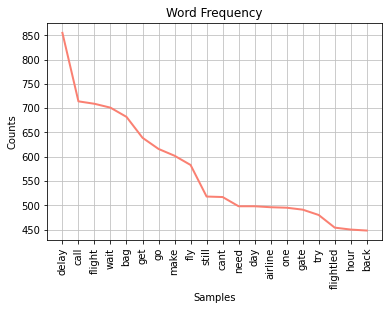

In [148]:
# Nltk word frequency
all_words=[]        
for i in range(len(tweets_cleaned['text'])):
    all_words += tweets_cleaned['text'][i].split()

#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

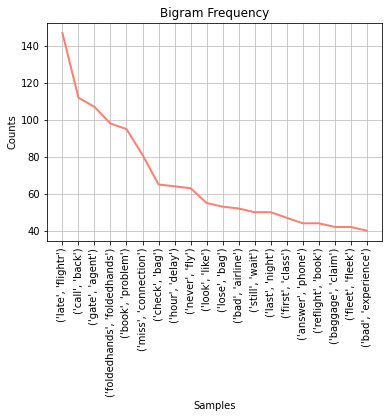

In [149]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [150]:
import nltk
from nltk.collocations import *
bigram= nltk.collocations.BigramAssocMeasures()
Collocation = BigramCollocationFinder.from_words(all_words)
Collocation.nbest(bigram.pmi, 10)

[('1007p', 'smoothoperation'),
 ('1045pm', 'joanne'),
 ('11a', '1130a'),
 ('1213ewrlax', 'ua1151'),
 ('12th', 'februaryi'),
 ('14hrs', 'traveling'),
 ('15hr', 'wbroken'),
 ('1stclass', 'wnonworking'),
 ('20years', 'eventprof'),
 ('21feb15', 'dcarsw')]

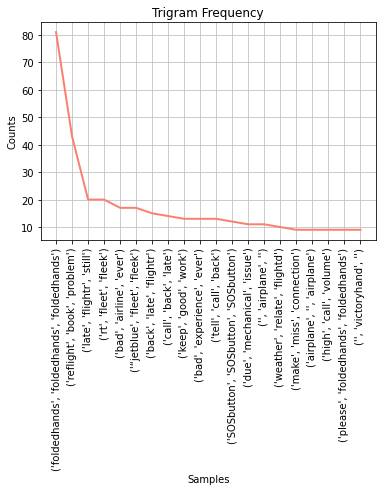

In [151]:
#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency')

In [152]:
import nltk
from nltk.collocations import *
trigram= nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(all_words)
finder.nbest(trigram.pmi, 10)

[('1213ewrlax', 'ua1151', 'seatarmrest'),
 ('15hr', 'wbroken', 'dreamliner'),
 ('1stclass', 'wnonworking', 'entertainmnt'),
 ('2d', '3d', 'embossed'),
 ('2plains', '2fails', 'murphyjulie'),
 ('4h2m', '5h2m', 'timezones'),
 ('559pm', 'dpted', '830pm'),
 ('5h2m', 'timezones', 'accuratetraveltimes'),
 ('830a', '9a', '930a'),
 ('NGbutton', 'author', 'fiction')]

In [153]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [154]:
wordcloud_before = WordCloud().generate(' '.join(tweets_cleaned['text']))

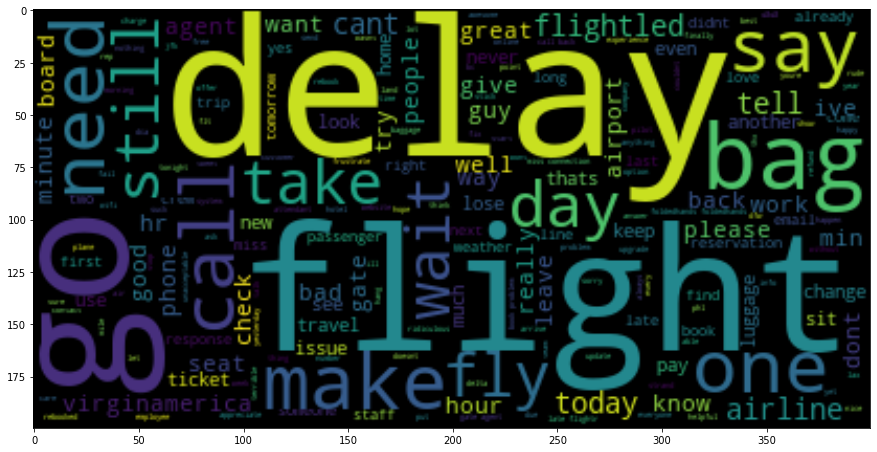

In [155]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_before, interpolation='bilinear')

- Try adding a extra step in the cleaning pipeline to get rid of unwanted numbers. Try uisng regex.
- Re-run the classifiers and see if there is any improvement in the results.

In [ ]:
## Class work
## Detect Emoji's and emoticons and replace them with the words

## Remove numbers and unwanted no required chars.
## try using - my_string.isalpha(), my_string.isdigit(), my_string.isalnum()

In [156]:
tweets_data.head(2)

,text,airline_sentiment,text_lower,text_emoji_Y/N_before,text_NoEmoji,text_emoji_Y/N_after,emoji_lib_check,text_emoticons_Y/N_before,text_without_URLS,text_wo_punct,text_wo_stop,text_wo_digits,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized
0,@VirginAmerica plus you've added commercials t...,positive,@virginamerica plus you've added commercials t...,0,@virginamerica plus you've added commercials t...,0,No changes made,0,@virginamerica plus you've added commercials t...,virginamerica plus youve added commercials to ...,virginamerica plus youve added commercials exp...,virginamerica plus youve added commercials exp...,virginamerica plus youve added commercials exp...,virginamerica plus youve added commercials exp...,virginamerica plu youv ad commerci experi tacki,virginamerica plus youve added commercial expe...
1,@VirginAmerica it's really aggressive to blast...,negative,@virginamerica it's really aggressive to blast...,0,@virginamerica it's really aggressive to blast...,0,No changes made,0,@virginamerica it's really aggressive to blast...,virginamerica its really aggressive to blast o...,virginamerica really aggressive blast obnoxiou...,virginamerica really aggressive blast obnoxiou...,virginamerica really aggressive blast obnoxiou...,virginamerica really aggressive blast obnoxiou...,virginamerica realli aggress blast obnoxi ente...,virginamerica really aggressive blast obnoxiou...


## Using TextBlob

The textblob.sentiments module contains two sentiment analysis implementations, `PatternAnalyzer` (based on the pattern library) and `NaiveBayesAnalyzer` (an NLTK classifier trained on a movie reviews corpus).

In [160]:
# Override default implementation by pattern lib
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [161]:
blob_obj = TextBlob('I do not like Amazon', analyzer=NaiveBayesAnalyzer())
blob_score = blob_obj.sentiment
blob_score

Sentiment(classification='neg', p_pos=0.29083644362605926, p_neg=0.7091635563739407)

**Check the parameters you can pass to TextBlob** `(classifier)`

In [162]:
blob_obj = TextBlob('I am :)', analyzer=NaiveBayesAnalyzer())
blob_score = blob_obj.sentiment
blob_score

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)

In [163]:
blob_obj = TextBlob('Your service has never been good', analyzer=NaiveBayesAnalyzer())
blob_score = blob_obj.sentiment
blob_score

Sentiment(classification='pos', p_pos=0.5461019756425566, p_neg=0.4538980243574434)

In [164]:
blob_obj = TextBlob('I hate flowers', analyzer=NaiveBayesAnalyzer())
blob_score = blob_obj.sentiment
blob_score

Sentiment(classification='pos', p_pos=0.6271718146718148, p_neg=0.37282818532818496)

In [165]:
blob_obj = TextBlob('The product was not bad', analyzer=NaiveBayesAnalyzer())
blob_score = blob_obj.sentiment
blob_score

Sentiment(classification='neg', p_pos=0.2412150447821131, p_neg=0.7587849552178869)

## Introduction to Spacy

In [166]:
## Function to convert data into Spacy format
## Using the old tweets_cleaned if required to test this data set else use the IMDB once

data_spacy = []
for row in range(tweets_cleaned.shape[0]):
  cats = {'pos' : False, 'neg': False}
  if tweets_cleaned['sentiments'].loc[row] == 'positive':
    cats['pos'] = True
  else:
    cats['neg'] = True
  temp = {"cats" : cats}
  data_spacy.append((tweets_cleaned['text'].loc[row], temp))

data_spacy[:3]

[('virginamerica plus youve added commercial experience tacky',
  {'cats': {'neg': False, 'pos': True}}),
 ('virginamerica really aggressive blast obnoxious entertainment guest face little recourse',
  {'cats': {'neg': True, 'pos': False}}),
 ('virginamerica really big bad thing', {'cats': {'neg': True, 'pos': False}})]

In [167]:
!pip install spacy
!spacy download en_core_web_sm
!spacy download en_core_web_md
# !spacy download en_core_web_lg

     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 96.4 MB 1.2 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=081ac91c9c14cb4b16ecb25cd734354564da7f7b0adab7e81df32cd40461aaf8
  Stored in directory: /tmp/pip-ephem-wheel-cache-a_05cly9/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [168]:
import spacy
nlp = spacy.load("en_core_web_sm")
# Can directly load 'lg' & 'md' model like 'sm' models but some times it gives errors. Try this method
import en_core_web_md
nlp_md = en_core_web_md.load()
# import en_core_web_lg 
# nlp_lg = en_core_web_lg.load()

## Can also use
# from spacy.lang.en import English
# nlp = English()

In [169]:
# In Spacy world a doc object is the top most class object
# Under it lies the Span object - A part of doc ex: doc[1:5]
# Token is the word or punct etc..
# Lexicals are the smallest units which have a meaning in that particular lang

# How easy it is to tokenize text in Spacy
text = """
Dave watched as the forest burned up on the hill,
only a few miles from his house. The car had
been hastily packed and Marta was inside trying to round
up the last of the pets. "Where could she be?" he wondered
as he continued to wait for Marta to appear with the pets.
"""
doc = nlp(text)
token_list = [token for token in doc]
print(token_list)

[
, Dave, watched, as, the, forest, burned, up, on, the, hill, ,, 
, only, a, few, miles, from, his, house, ., The, car, had, 
, been, hastily, packed, and, Marta, was, inside, trying, to, round, 
, up, the, last, of, the, pets, ., ", Where, could, she, be, ?, ", he, wondered, 
, as, he, continued, to, wait, for, Marta, to, appear, with, the, pets, ., 
]


In [170]:
# Second way
second_way = nlp('Hi how are you John ? @ www.abc.com mnk@abc.com')
for token in second_way:
  print(token.text)

Hi
how
are
you
John
?
@
www.abc.com
mnk@abc.com


In [ ]:
# The key difference between token and token.text is that 
# token is still in Spacy world like a spacy object 
# but token.text is a pure string type which is ready to be used outside the Spacy world

In [171]:
# A part of the doc is called as span
span = second_way[:2]
print(f"Hi, I'm still too Spacy ---- {span}\nMy type ---- {type(span)}")

Hi, I'm still too Spacy ---- Hi how
My type ---- <class 'spacy.tokens.span.Span'>


In [172]:
second_way[:4]

Hi how are you

In [173]:
# A part of the doc is called as span
span = second_way[:2]
print(f"Hi, I'm not that atas ---- {span.text}\nMy type ---- {type(span.text)}")

Hi, I'm not that atas ---- Hi how
My type ---- <class 'str'>


In [174]:
# Check more about spacy

# Check my index:
print(*[f' Index: {token.i}' for token in second_way], sep=',')

# Check my text
print(*[f' Text: {token.text}' for token in second_way], sep=',')

# Check if i am alphabet or not
print(*[f' is_alpha: {token.is_alpha}' for token in second_way], sep=',')

# Check if i am a punctuation mark or not 
print(*[f' is_punct: {token.is_punct}' for token in second_way], sep=',')

# Am i a number ?
print(*[f' like_num: {token.like_num}' for token in second_way], sep=',')

# Do i have a address ?
print(*[f' like_url: {token.like_url}' for token in second_way], sep=',')

# Send me an email 
print(*[f' like_email: {token.like_email}' for token in second_way], sep=',')

 Index: 0, Index: 1, Index: 2, Index: 3, Index: 4, Index: 5, Index: 6, Index: 7, Index: 8
 Text: Hi, Text: how, Text: are, Text: you, Text: John, Text: ?, Text: @, Text: www.abc.com, Text: mnk@abc.com
 is_alpha: True, is_alpha: True, is_alpha: True, is_alpha: True, is_alpha: True, is_alpha: False, is_alpha: False, is_alpha: False, is_alpha: False
 is_punct: False, is_punct: False, is_punct: False, is_punct: False, is_punct: False, is_punct: True, is_punct: True, is_punct: False, is_punct: False
 like_num: False, like_num: False, like_num: False, like_num: False, like_num: False, like_num: False, like_num: False, like_num: False, like_num: False
 like_url: False, like_url: False, like_url: False, like_url: False, like_url: False, like_url: False, like_url: False, like_url: True, like_url: False
 like_email: False, like_email: False, like_email: False, like_email: False, like_email: False, like_email: False, like_email: False, like_email: False, like_email: True


In [175]:
# Understand the part of speech 
for token in second_way:
  print(f"Token: {token}    POS: {token.pos_}")

Token: Hi    POS: INTJ
Token: how    POS: ADV
Token: are    POS: AUX
Token: you    POS: PRON
Token: John    POS: PROPN
Token: ?    POS: PUNCT
Token: @    POS: ADP
Token: www.abc.com    POS: PROPN
Token: mnk@abc.com    POS: X


In [176]:
# Syntactic dependency
for token in second_way:
  print(f"Text: {token.text}, POS: {token.pos_}, Dep: {token.dep_}, Head: {token.head.text}")

Text: Hi, POS: INTJ, Dep: ROOT, Head: Hi
Text: how, POS: ADV, Dep: advmod, Head: are
Text: are, POS: AUX, Dep: ccomp, Head: Hi
Text: you, POS: PRON, Dep: nsubj, Head: are
Text: John, POS: PROPN, Dep: attr, Head: are
Text: ?, POS: PUNCT, Dep: punct, Head: are
Text: @, POS: ADP, Dep: ROOT, Head: @
Text: www.abc.com, POS: PROPN, Dep: ROOT, Head: www.abc.com
Text: mnk@abc.com, POS: X, Dep: ROOT, Head: mnk@abc.com


In [177]:
# Know the Named Entities (Will be usefull at Sentence level and entity level sentiment mining)
# This is where the magic of corpus will come into picture.
# We imported a english model which might be trained over news or general english text. 
# So this model can find person names, city names etc...
# Try giving it some virus names or drug names it might not catch any.
# So you have to find any other pre-trained model from medical.

for ent in second_way.ents:
  print(f"Text: {ent.text} ---- Entity type: {ent.label_}")

Text: John ---- Entity type: PERSON


In [178]:
# Can understand the tags 
spacy.explain("NNP")

'noun, proper singular'

In [179]:
# Check existing vocab in Spacy (Wrong way to check it. Dont use it ever)
vocab = [word.text for word in second_way.vocab]
vocab[:20]

['nuthin',
 'there',
 'ü.',
 '’nuff',
 'havin',
 "'bout",
 '’Cause',
 '@',
 'Need',
 'Somethin',
 'gon',
 'N.C.',
 '\\n',
 ' ',
 'Sept.',
 'c.',
 'E.G.',
 'Mont.',
 'b.',
 ':-}']

**Understand in detail visit** -- [Spacy API webisite](https://spacy.io/api)

In [180]:
# Easily remove stop words (Works for different languages)
filtered_tokens = [token for token in doc if not token.is_stop]
print(filtered_tokens)

[
, Dave, watched, forest, burned, hill, ,, 
, miles, house, ., car, 
, hastily, packed, Marta, inside, trying, round, 
, pets, ., ", ?, ", wondered, 
, continued, wait, Marta, appear, pets, ., 
]


In [181]:
# Lemmatization
lemmas = [token.lemma_ for token in filtered_tokens]
print(lemmas, '\n')

# More easy to compare
token_lemmas = [f"Token: {token}, lemma: {token.lemma_}" for token in filtered_tokens]
print(token_lemmas)

['\n', 'Dave', 'watch', 'forest', 'burn', 'hill', ',', '\n', 'mile', 'house', '.', 'car', '\n', 'hastily', 'pack', 'Marta', 'inside', 'try', 'round', '\n', 'pet', '.', '"', '?', '"', 'wonder', '\n', 'continue', 'wait', 'Marta', 'appear', 'pet', '.', '\n'] 

['Token: \n, lemma: \n', 'Token: Dave, lemma: Dave', 'Token: watched, lemma: watch', 'Token: forest, lemma: forest', 'Token: burned, lemma: burn', 'Token: hill, lemma: hill', 'Token: ,, lemma: ,', 'Token: \n, lemma: \n', 'Token: miles, lemma: mile', 'Token: house, lemma: house', 'Token: ., lemma: .', 'Token: car, lemma: car', 'Token: \n, lemma: \n', 'Token: hastily, lemma: hastily', 'Token: packed, lemma: pack', 'Token: Marta, lemma: Marta', 'Token: inside, lemma: inside', 'Token: trying, lemma: try', 'Token: round, lemma: round', 'Token: \n, lemma: \n', 'Token: pets, lemma: pet', 'Token: ., lemma: .', 'Token: ", lemma: "', 'Token: ?, lemma: ?', 'Token: ", lemma: "', 'Token: wondered, lemma: wonder', 'Token: \n, lemma: \n', 'Token: 

In [183]:
# Check similarty of words (both conventinal models based and Glove or Language model based)
# Read the error carefully 
# nlp is small model or non word_2_vec model

word_1 = nlp('red')
word_2 = nlp('blue')
word_3 = nlp('lion')

print(word_1.similarity(word_2), '\n')
print(word_2.similarity(word_3),)

0.7121832962162719 

0.4253357728977122


/usr/lib/python3.7/runpy.py:193: ModelsWarning:

[W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.

/usr/lib/python3.7/runpy.py:193: ModelsWarning:

[W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.



In [184]:
print(f" No of dims: {filtered_tokens[1].vector.shape}", '\n')
filtered_tokens[1].vector

 No of dims: (96,) 



array([ 1.6193167e+00, -2.7117019e+00, -6.8552375e-01,  2.6652899e+00,
        4.5226312e+00,  2.8338575e+00,  6.1740106e-01,  9.5401168e-01,
        2.6201737e+00,  2.5994289e+00,  5.9061027e+00, -1.7552420e-01,
       -8.7880111e-01,  4.8553795e-03, -1.7236035e+00, -1.7494547e+00,
       -1.0313329e+00,  1.6518956e-01,  5.3024960e-01, -3.2018152e-01,
       -2.6411371e+00, -2.4750671e+00, -5.0014794e-01, -3.3213449e+00,
       -5.3300351e-01,  2.3968523e+00,  1.5485952e+00, -2.2231889e+00,
       -1.2597762e+00, -5.6858027e-01, -9.4768405e-02, -1.3759263e+00,
       -1.0165324e+00,  5.6860483e-01,  2.6817162e+00, -3.7418640e+00,
        2.7644300e+00, -1.9967061e+00, -2.9627855e+00, -1.0863459e-01,
        2.7437925e+00,  2.5450244e+00,  1.6124392e+00, -3.3037057e+00,
       -2.4419413e+00,  9.5868981e-01,  1.1957375e+00, -1.2429583e+00,
       -1.2961357e+00,  2.8916957e+00, -2.8091950e+00, -3.1826324e+00,
       -2.4809690e+00, -2.5254309e-01, -2.0454383e+00,  3.0948038e+00,
      

[Read more about models from Spacy website and notice the key variations in them.](https://spacy.io/usage/models)

[English model details](https://spacy.io/models/en)

In [185]:
# Using medium size model (This one is Glove based. Same like Word2Vec)

word_1 = nlp_md('red')
word_2 = nlp_md('blue')
word_3 = nlp_md('lion')

print(word_1.similarity(word_2), '\n')
print(word_2.similarity(word_3),)

0.8438411569507711 

0.32162900031520353


In [ ]:
"""word_1 = nlp_lg('red')
word_2 = nlp_lg('blue')
word_3 = nlp_lg('lion')

print(word_1.similarity(word_2), '\n')
print(word_2.similarity(word_3),)"""

"word_1 = nlp_lg('red')\nword_2 = nlp_lg('blue')\nword_3 = nlp_lg('lion')\n\nprint(word_1.similarity(word_2), '\n')\nprint(word_2.similarity(word_3),)"

In [190]:
# What we saw was more like Token similarity
# What about document level 
# Using small model

doc_1 = nlp("I like to play football")
doc_2 = nlp("I like to play soccer")
doc_3 = nlp("I like the ice cream")

print(doc_1.similarity(doc_2), '\n')

0.9583541023873718 



/usr/lib/python3.7/runpy.py:193: ModelsWarning:

[W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.



In [191]:
# What we saw was more like Token similarity
# What about document level 
# Using medium model (Word2Vector model)

doc_1 = nlp_md("I like to play football")
doc_2 = nlp_md("I like to play soccer")
doc_3 = nlp_md("I like the ice cream")

print(doc_1.similarity(doc_2), '\n')

0.9805218684559309 



In [ ]:
# Can do the same for span similarty

In [192]:
# Can check the doc vector for medium model
doc_1.vector.shape

(300,)

In [ ]:
# This is very handy in recomendations engine and finding similar text. 
# If you know some negative comments then find some more with top confidence with this and use for models
# and repeat the loop and make more training data (Not the best idea but used a lot)

#### Data prep for training classifier in Spacy

In [193]:
import os
os.chdir('/content/')

# unzip the data
!sudo tar -xvf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

The function writing style is called [Support for type hints](https://docs.python.org/3/library/typing.html) \
Nothing new just a little bit type hints are added. You can revert back without getting any error.

In [194]:
import os
import random

def load_training_data(data_directory: str = "aclImdb/train", split: float = 0.8, limit: int = 0) -> tuple:
    # Load from files
    reviews = []
    for label in ["pos", "neg"]:
        labeled_directory = f"{data_directory}/{label}"
        for review in os.listdir(labeled_directory):
            if review.endswith(".txt"):
                with open(f"{labeled_directory}/{review}") as f:
                    text = f.read()
                    text = text.replace("<br />", "\n\n")
                    if text.strip():
                        spacy_label = {
                            "cats": {
                                "pos": "pos" == label,
                                "neg": "neg" == label}
                        }
                        reviews.append((text, spacy_label))
    random.shuffle(reviews)

    if limit:
        reviews = reviews[:limit]
    split = int(len(reviews) * split)
    return reviews[:split], reviews[split:]

In [195]:
training_data, testing_data = load_training_data("aclImdb/train", 0.8, 2500)

In [196]:
type(training_data)

list

In [197]:
len(training_data)

2000

In [198]:
training_data[:3]

[('Finally, the uncut version of "Baby Face" surfaces and from what source? The Library of Congress. The restored four minutes, snippets here and there, make for a much better film. We now know that Baby Face was pimped by her old man from the time she was at least fourteen years of age. Another reason d\'tat for her behavior and cold, calculating exterior.\n\n\n\nBarbara Stanwyck is indeed amazing in the role of Lily Powers (notice the moniker), a part that called for just the right amount of sexuality coated with power, cunning, and revenge, yet tinged with virginal pretense when called for, a very difficult portrayal to make convincing. Barbara Stanwyck conveys the necessary nuances to show that though she sleeps her way to the top (literally), she still has good in her heart--note the way she treats those few who have been kind to her such as Chico (the marvelous actress Theresa Harris) and the old philosopher. And though she exploits her sexuality to make mush of men who are rich 

In [199]:
len(testing_data)

500

In [200]:
testing_data[:3]

[("The film Torrent was a first and a last for Greta Garbo. It was her first American made film at MGM, the only studio in the USA that she would ever work at. It was also the last time that someone else was billed above her in the credits, that being her leading man her Ricardo Cortez.\n\n\n\nTorrent is based on the popular Spanish writer's Vicente Blasco Ibanez's work Entre Naranjos. It concerns a pair of mismatched lovers, Garbo and Cortez, who can't quite get together, mostly due to the machinations of Cortez's mother Marta Mattox. \n\n\n\nMattox is a wicked woman who has some set ideas about who her son should be marrying. Remember this is Spain and such arranged marriages were still even in those times quite proper. Mattox has Gertrude Olmstead in mind as a daughter-in-law, she's the offspring of Mack Swain a man grown rich in hog raising. Swain provides a few moments of comic relief with his tender concern for the piglets before they grow into big old hogs to be butchered.\n\n\n

```
## Build pipeline

# Change this for loading medium or large models
nlp = spacy.load("en_core_web_sm") 

# Our outcome pipeline name is 'textcat'
# now we check if this already does not exist in internal pipeline

# If it does not exit make it with 'textcat' and in configuration tell the 
# classifier architecture you want to use like 'Simple_cnn' or 
# BOW (bag of words) or 'hybrid'. Check the documentation for more details. 

if "textcat" not in nlp.pipe_names:
    textcat = nlp.create_pipe("textcat", config={"architecture": "simple_cnn"})
    nlp.add_pipe(textcat, last=True)

else:
    textcat = nlp.get_pipe("textcat")

# Tell textcat (means text categorization) will have 2 lables to predict
textcat.add_label("pos")
textcat.add_label("neg")

# There might be inbuid or other other custom elements in the pipeline
# we fist  get the list of those items and put them all in exclusion while 
# model training. 

# Train only textcat
training_excluded_pipes = [pipe for pipe in nlp.pipe_names if pipe != "textcat"]

# here in first function we told it to exclude the list
# rest are the hyper-parameters we have set for the training
# in the end we print the results

with nlp.disable_pipes(training_excluded_pipes):
    optimizer = nlp.begin_training()
    # Training loop
    print("Beginning training")
    print("Loss\tPrecision\tRecall\tF-score")
    batch_sizes = compounding(
        4.0, 32.0, 1.001
    )  # A generator that yields infinite series of input numbers
    for i in range(iterations):
        print(f"Training iteration {i}")
        loss = {}
        random.shuffle(training_data)
        batches = minibatch(training_data, size=batch_sizes)
        for batch in batches:
            text, labels = zip(*batch)
            nlp.update(text, labels, drop=0.2, sgd=optimizer, losses=loss)
        with textcat.model.use_params(optimizer.averages):
            evaluation_results = evaluate_model(
                tokenizer=nlp.tokenizer,
                textcat=textcat,
                test_data=test_data
            )
            print(
                f"{loss['textcat']}\t{evaluation_results['precision']}"
                f"\t{evaluation_results['recall']}"
                f"\t{evaluation_results['f-score']}"
            )

# Save the artifcats of the model because we dont want to retrain the model

# Save model
with nlp.use_params(optimizer.averages):
    nlp.to_disk("model_artifacts")

```



In [201]:
import os
import random
import spacy
from spacy.util import minibatch, compounding

def train_model(
    training_data: list,
    test_data: list,
    iterations: int = 20
) -> None:
    # Build pipeline
    nlp = spacy.load("en_core_web_sm") # Change this for loading medium or large models
    if "textcat" not in nlp.pipe_names:
        textcat = nlp.create_pipe(
            "textcat", config={"architecture": "simple_cnn"}
        )
        nlp.add_pipe(textcat, last=True)
    else:
        textcat = nlp.get_pipe("textcat")

    textcat.add_label("pos")
    textcat.add_label("neg")

    # Train only textcat
    training_excluded_pipes = [
        pipe for pipe in nlp.pipe_names if pipe != "textcat"
    ]
    with nlp.disable_pipes(training_excluded_pipes):
        optimizer = nlp.begin_training()
        # Training loop
        print("Beginning training")
        print("Loss\tPrecision\tRecall\tF-score")
        batch_sizes = compounding(
            4.0, 32.0, 1.001
        )  # A generator that yields infinite series of input numbers
        for i in range(iterations):
            print(f"Training iteration {i}")
            loss = {}
            random.shuffle(training_data)
            batches = minibatch(training_data, size=batch_sizes)
            for batch in batches:
                text, labels = zip(*batch)
                nlp.update(text, labels, drop=0.2, sgd=optimizer, losses=loss)
            with textcat.model.use_params(optimizer.averages):
                evaluation_results = evaluate_model(
                    tokenizer=nlp.tokenizer,
                    textcat=textcat,
                    test_data=test_data
                )
                print(
                    f"{loss['textcat']}\t{evaluation_results['precision']}"
                    f"\t{evaluation_results['recall']}"
                    f"\t{evaluation_results['f-score']}"
                )

    # Save model
    with nlp.use_params(optimizer.averages):
        nlp.to_disk("model_artifacts")

In [202]:
def evaluate_model(
    tokenizer, textcat, test_data: list
) -> dict:
    reviews, labels = zip(*test_data)
    reviews = (tokenizer(review) for review in reviews)
    true_positives = 0
    false_positives = 1e-8  # Can't be 0 because of presence in denominator
    true_negatives = 0
    false_negatives = 1e-8
    for i, review in enumerate(textcat.pipe(reviews)):
        true_label = labels[i]['cats']
        for predicted_label, score in review.cats.items():
            # Every cats dictionary includes both labels. You can get all
            # the info you need with just the pos label.
            if (
                predicted_label == "neg"
            ):
                continue
            if score >= 0.5 and true_label["pos"]:
                true_positives += 1
            elif score >= 0.5 and true_label["neg"]:
                false_positives += 1
            elif score < 0.5 and true_label["neg"]:
                true_negatives += 1
            elif score < 0.5 and true_label["pos"]:
                false_negatives += 1
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    if precision + recall == 0:
        f_score = 0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"precision": precision, "recall": recall, "f-score": f_score}

In [203]:
train_model(training_data, testing_data, 12)

Beginning training
Loss	Precision	Recall	F-score
Training iteration 0
11.321787955239415	0.7704280155342246	0.7199999999738181	0.7443609022276556
Training iteration 1
1.957411906158086	0.815217391274811	0.8181818181520661	0.8166969146709003
Training iteration 2
0.5518365205280134	0.8244897958847147	0.7345454545187438	0.7769230768931952
Training iteration 3
0.19255148947013367	0.8384615384292899	0.7927272726984462	0.8149532709975719
Training iteration 4
0.0715483046215013	0.831372548987005	0.7709090908810579	0.7999999999698113
Training iteration 5
0.02908256501291362	0.8404669260373359	0.7854545454259835	0.8120300751574424
Training iteration 6
0.0153143127547537	0.8425196850062	0.7781818181535206	0.8090737239769726
Training iteration 7
0.008055558723555123	0.8359999999665599	0.7599999999723636	0.796190476160145
Training iteration 8
0.007873661409291799	0.8359999999665599	0.7599999999723636	0.796190476160145
Training iteration 9
0.002988674354980958	0.833992094828696	0.7672727272448264	0

Read more about [training Spacy classifier](https://spacy.io/usage/training#textcat) and [textcategorizer API](https://spacy.io/api/textcategorizer)

In [204]:
# Load saved model
loaded_model = spacy.load("model_artifacts") 

In [207]:
TEST_REVIEW = """
Transcendently beautiful in moments outside the office, it seems almost
sitcom-like in those scenes. When Toni Colette walks out and ponders
life silently, it's gorgeous.<br /><br />The movie doesn't seem to decide
whether it's slapstick, farce, magical realism, or drama, but the best of it
doesn't matter. (The worst is sort of tedious - like Office Space with less humor.)
"""

In [208]:
# Test predictions for reviews
def test_model(input_data: str = TEST_REVIEW):
    #  Load saved trained model
    loaded_model = spacy.load("model_artifacts")
    # Generate prediction
    parsed_text = loaded_model(input_data)
    # Determine prediction to return
    if parsed_text.cats["pos"] > parsed_text.cats["neg"]:
        prediction = "Positive"
        score = parsed_text.cats["pos"]
    else:
        prediction = "Negative"
        score = parsed_text.cats["neg"]
    print(f"Review text: {input_data}\nPredicted sentiment: {prediction}"
        f"\tScore: {score}")

In [209]:
test_model(TEST_REVIEW)

Review text: 
Transcendently beautiful in moments outside the office, it seems almost
sitcom-like in those scenes. When Toni Colette walks out and ponders
life silently, it's gorgeous.<br /><br />The movie doesn't seem to decide
whether it's slapstick, farce, magical realism, or drama, but the best of it
doesn't matter. (The worst is sort of tedious - like Office Space with less humor.)

Predicted sentiment: Positive	Score: 0.9998794794082642


## Using stanfordnlp or Stanza (old version is stanfordCoreNLP)
[weblink](https://stanfordnlp.github.io/stanza/)

In [210]:
!pip install stanza

     |████████████████████████████████| 432 kB 5.0 MB/s 


In [211]:
import stanza
stanza.download('en') # loaded the 
nlp = stanza.Pipeline('en')

2022-01-07 15:32:30 INFO: Downloading default packages for language: en (English)...


2022-01-07 15:32:46 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-01-07 15:32:46 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-01-07 15:32:47 INFO: Use device: cpu
2022-01-07 15:32:47 INFO: Loading: tokenize
2022-01-07 15:32:47 INFO: Loading: pos
2022-01-07 15:32:47 INFO: Loading: lemma
2022-01-07 15:32:47 INFO: Loading: depparse
2022-01-07 15:32:47 INFO: Loading: sentiment
2022-01-07 15:32:48 INFO: Loading: constituency
2022-01-07 15:32:49 INFO: Loading: ner
2022-01-07 15:32:50 INFO: Done loading processors!


In [212]:
doc = nlp('I do not like Amazon. I am :). Your service has never been good. I hate flowers. The product was not bad')

In [213]:
doc

[
  [
    {
      "id": 1,
      "text": "I",
      "lemma": "I",
      "upos": "PRON",
      "xpos": "PRP",
      "feats": "Case=Nom|Number=Sing|Person=1|PronType=Prs",
      "head": 4,
      "deprel": "nsubj",
      "start_char": 0,
      "end_char": 1,
      "ner": "O"
    },
    {
      "id": 2,
      "text": "do",
      "lemma": "do",
      "upos": "AUX",
      "xpos": "VBP",
      "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin",
      "head": 4,
      "deprel": "aux",
      "start_char": 2,
      "end_char": 4,
      "ner": "O"
    },
    {
      "id": 3,
      "text": "not",
      "lemma": "not",
      "upos": "PART",
      "xpos": "RB",
      "head": 4,
      "deprel": "advmod",
      "start_char": 5,
      "end_char": 8,
      "ner": "O"
    },
    {
      "id": 4,
      "text": "like",
      "lemma": "like",
      "upos": "VERB",
      "xpos": "VB",
      "feats": "VerbForm=Inf",
      "head": 0,
      "deprel": "root",
      "start_char": 9,
      "end_char": 13,
      "ner": "O

In [214]:
print(f'No of sentences: {len(doc.sentences)}', '\n')
print(f'No of tokens: {doc.num_tokens}', '\n')
print(f'No of words: {doc.num_words}', '\n')
print(f'No of entities: {len(doc.entities)}', '\n')
print(*[f'Sentence: {sentence}\n' for sentence in doc.sentences])

No of sentences: 5 

No of tokens: 26 

No of words: 26 

No of entities: 1 

Sentence: [
  {
    "id": 1,
    "text": "I",
    "lemma": "I",
    "upos": "PRON",
    "xpos": "PRP",
    "feats": "Case=Nom|Number=Sing|Person=1|PronType=Prs",
    "head": 4,
    "deprel": "nsubj",
    "start_char": 0,
    "end_char": 1,
    "ner": "O"
  },
  {
    "id": 2,
    "text": "do",
    "lemma": "do",
    "upos": "AUX",
    "xpos": "VBP",
    "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin",
    "head": 4,
    "deprel": "aux",
    "start_char": 2,
    "end_char": 4,
    "ner": "O"
  },
  {
    "id": 3,
    "text": "not",
    "lemma": "not",
    "upos": "PART",
    "xpos": "RB",
    "head": 4,
    "deprel": "advmod",
    "start_char": 5,
    "end_char": 8,
    "ner": "O"
  },
  {
    "id": 4,
    "text": "like",
    "lemma": "like",
    "upos": "VERB",
    "xpos": "VB",
    "feats": "VerbForm=Inf",
    "head": 0,
    "deprel": "root",
    "start_char": 9,
    "end_char": 13,
    "ner": "O"
  },
  {
    "

In [215]:
print(f'First sentence : {doc.sentences[0].text}', '\n')
print(f'No of tokens: {len(doc.sentences[0].tokens)}', '\n')
print(f'No of words: {len(doc.sentences[0].words)}', '\n')
print(f'No of entities: {len(doc.sentences[0].entities)}', '\n')

First sentence : I do not like Amazon. 

No of tokens: 6 

No of words: 6 

No of entities: 1 



In [216]:
print(f'First sentence : {doc.sentences[0].tokens[4].text}', '\n')
print(f'Start: {doc.sentences[0].tokens[4].start_char}', '\n')
print(f'End: {doc.sentences[0].tokens[4].end_char}', '\n')

First sentence : Amazon 

Start: 14 

End: 20 



In [217]:
print(f'First sentence : {doc.sentences[0].words[3].text}', '\n')
print(f'Lemma: {doc.sentences[0].words[3].lemma}', '\n')
print(f'upos: {doc.sentences[0].words[3].upos}', '\n')
print(f'xpos: {doc.sentences[0].words[3].xpos}', '\n')

First sentence : like 

Lemma: like 

upos: VERB 

xpos: VB 



In [218]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')
doc = nlp('I do not like Amazon. I am :). Your service has never been good. I hate flowers. The product was not bad')
sentiment_dict = {0: "Negative",
                  1: "Neutral",
                  2: "Positive"}
for i, sentence in enumerate(doc.sentences):
    print(i, sentence.text, '-'*10 , sentiment_dict[sentence.sentiment])

2022-01-07 15:33:11 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-01-07 15:33:11 INFO: Use device: cpu
2022-01-07 15:33:11 INFO: Loading: tokenize
2022-01-07 15:33:11 INFO: Loading: sentiment
2022-01-07 15:33:12 INFO: Done loading processors!


0 I do not like Amazon. ---------- Neutral
1 I am :). ---------- Neutral
2 Your service has never been good. ---------- Negative
3 I hate flowers. ---------- Negative
4 The product was not bad ---------- Negative


# Emotion Detection

In [219]:
!pip install text2emotion

     |████████████████████████████████| 57 kB 3.1 MB/s 


In [220]:
#Import the modules
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [221]:
text1 = """ I was asked to sign a third party contract a week out from stay.
If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. 
Bathrooms - there are no stand alone bathrooms. 
Please consider this - you have to clear out the main bedroom to use that bathroom. 
Other option is you walk through a different bedroom to get to its en-suite. 
Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. 
Perhaps some people like this but It negatively affected our enjoyment of the accommodation. 
Stairs - lots of them - some had slightly bending wood which caused a minor injury. """

In [222]:
#Call to the function
te.get_emotion(text1)

{'Angry': 0.12, 'Fear': 0.42, 'Happy': 0.04, 'Sad': 0.33, 'Surprise': 0.08}

In [223]:
text2 = "Day was pretty amazing😃😃"
te.get_emotion(text2)

{'Angry': 0.0, 'Fear': 0.0, 'Happy': 1.0, 'Sad': 0.0, 'Surprise': 0.0}

In [224]:
text3 = "Some of them are idiots"
te.get_emotion(text3)

{'Angry': 0, 'Fear': 0, 'Happy': 0, 'Sad': 0, 'Surprise': 0}

In [225]:
# Make a list of text1, text2 and text3

text = [text1, text2, text3]
text

[" I was asked to sign a third party contract a week out from stay.\nIf it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. \nBathrooms - there are no stand alone bathrooms. \nPlease consider this - you have to clear out the main bedroom to use that bathroom. \nOther option is you walk through a different bedroom to get to its en-suite. \nSigns all over the apartment - there are signs everywhere - some helpful - some telling you rules. \nPerhaps some people like this but It negatively affected our enjoyment of the accommodation. \nStairs - lots of them - some had slightly bending wood which caused a minor injury. ",
 'Day was pretty amazing😃😃',
 'Some of them are idiots']

In [226]:
tweets = [
    "Watching the sopranos again from start to finish!",
    "Finding out i have to go to the  dentist tomorrow",
    "I want to go outside and chalk but I have no chalk",
    "I HATE PAPERS AH #AH #HATE",
    "My mom wasn't mad",
    "Do people have no Respect for themselves or you know others peoples homes",
]

In [227]:
for tweet in tweets:
  print(tweet, "\n")
  print(te.get_emotion(tweet), "\n")

Watching the sopranos again from start to finish! 

{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0} 

Finding out i have to go to the  dentist tomorrow 

{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0} 

I want to go outside and chalk but I have no chalk 

{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0} 

I HATE PAPERS AH #AH #HATE 

{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0} 

My mom wasn't mad 

{'Happy': 0.0, 'Angry': 1.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.0} 

Do people have no Respect for themselves or you know others peoples homes 

{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.0} 



# Others important things

### How to deal with negations
https://nlpforhackers.io/sentiment-analysis-intro/

### Dealing with inter annotation agreements for human classifications of documents
[Read more from here](https://corpuslinguisticmethods.wordpress.com/2014/01/15/what-is-inter-annotator-agreement/)

## Other useful tools:
- [Allen NLP Demo](https://demo.allennlp.org/sentiment-analysis)

- All About HuggingFace
  - [HuggingFace](https://api-inference.huggingface.co/docs/)
  - [HuggingFace Course](https://huggingface.co/course/chapter0/1)
  - [HuggingFace Colab Example Notebooks](https://github.com/huggingface/transformers/tree/master/notebooks)
  - [If you want to read about transformers](https://huggingface.co/transformers/)

- Pattern NLP
  - [Pattern NLP link 1](https://stackabuse.com/python-for-nlp-introduction-to-the-pattern-library/)
  - [Pattern NLP link 2](https://analyticsindiamag.com/hands-on-guide-to-pattern-a-python-tool-for-effective-text-processing-and-data-mining/)

- Polyglot
  - [Polyglot Link 1](https://pypi.org/project/polyglot/)
  - [Ployglot link 2](https://jcharistech.wordpress.com/2018/12/10/introduction-to-natural-language-processing-with-polyglot/)
  - [Ployglot link 3](https://analyticsindiamag.com/hands-on-tutorial-on-polyglot-python-toolkit-for-multilingual-nlp-applications/)
  - [Ployglot link 4](https://www.geeksforgeeks.org/natural-language-processing-using-polyglot-introduction/)

- [Flair](https://github.com/flairNLP/flair)
- [Monty Lingua by MIT - Nice one try it for NLG](https://alumni.media.mit.edu/~hugo/montylingua/)
- [textacy](https://pypi.org/project/textacy/)
- [Twitter Emotion Recognition - Must try it!!!](https://github.com/nikicc/twitter-emotion-recognition)


## Aditional cleaning functions
For more visit 
- [Kaggle cleaning functions list](https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing)
- [Emojie's & emoticons list with unicodes](https://unicode.org/emoji/charts/full-emoji-list.html#1f607)
- [How to handle Negating concepts & trigger terms (**Be careful it is very domain specific**)](https://medium.com/@MansiKukreja/clinical-text-negation-handling-using-negspacy-and-scispacy-233ce69ab2ac)
- [How NLTK is handling your negations](https://stackoverflow.com/questions/28720174/negation-handling-in-nlp)


In [ ]:
# clean or convert  emoticons and emoji's
# Another lib https://github.com/carpedm20/emoji

# this will work with emojis and emoticons
!pip install emot
import emot

In [ ]:
# Working with emoticons
text = "I love python :)"
emot.emoticons(text)

{'flag': True,
 'location': [[14, 16]],
 'mean': ['Happy face or smiley'],
 'value': [':)']}

In [ ]:
# Working with emoji's
text = "I love python 👨"
emot.emoji(text)

{'flag': True, 'location': [[14, 14]], 'mean': [':man:'], 'value': ['👨']}

In [ ]:
# Get Unicodes for string search and replace below
UNICODE_EMO = emot.UNICODE_EMO
EMOTICONS = emot.EMOTICONS

In [ ]:
EMOTICONS[':x']

'Sealed lips or wearing braces or tongue-tied'

In [ ]:
UNICODE_EMO['🔥']

':fire:'

In [ ]:
UNICODE_EMO.keys()

dict_keys(['🥇', '🥈', '🥉', '🆎', '🏧', '🅰', '🇦 🇫', '🇦 🇱', '🇩 🇿', '🇦 🇸', '🇦 🇩', '🇦 🇴', '🇦 🇮', '🇦 🇶', '🇦 🇬', '♒', '🇦 🇷', '♈', '🇦 🇲', '🇦 🇼', '🇦 🇨', '🇦 🇺', '🇦 🇹', '🇦 🇿', '🔙', '🅱', '🇧 🇸', '🇧 🇭', '🇧 🇩', '🇧 🇧', '🇧 🇾', '🇧 🇪', '🇧 🇿', '🇧 🇯', '🇧 🇲', '🇧 🇹', '🇧 🇴', '🇧 🇦', '🇧 🇼', '🇧 🇻', '🇧 🇷', '🇮 🇴', '🇻 🇬', '🇧 🇳', '🇧 🇬', '🇧 🇫', '🇧 🇮', '🆑', '🆒', '🇰 🇭', '🇨 🇲', '🇨 🇦', '🇮 🇨', '♋', '🇨 🇻', '♑', '🇧 🇶', '🇰 🇾', '🇨 🇫', '🇪 🇦', '🇹 🇩', '🇨 🇱', '🇨 🇳', '🇨 🇽', '🎄', '🇨 🇵', '🇨 🇨', '🇨 🇴', '🇰 🇲', '🇨 🇬', '🇨 🇩', '🇨 🇰', '🇨 🇷', '🇭 🇷', '🇨 🇺', '🇨 🇼', '🇨 🇾', '🇨 🇿', '🇨 🇮', '🇩 🇰', '🇩 🇬', '🇩 🇯', '🇩 🇲', '🇩 🇴', '🔚', '🇪 🇨', '🇪 🇬', '🇸 🇻', '🇬 🇶', '🇪 🇷', '🇪 🇪', '🇪 🇹', '🇪 🇺', '🆓', '🇫 🇰', '🇫 🇴', '🇫 🇯', '🇫 🇮', '🇫 🇷', '🇬 🇫', '🇵 🇫', '🇹 🇫', '🇬 🇦', '🇬 🇲', '♊', '🇬 🇪', '🇩 🇪', '🇬 🇭', '🇬 🇮', '🇬 🇷', '🇬 🇱', '🇬 🇩', '🇬 🇵', '🇬 🇺', '🇬 🇹', '🇬 🇬', '🇬 🇳', '🇬 🇼', '🇬 🇾', '🇭 🇹', '🇭 🇲', '🇭 🇳', '🇭 🇰', '🇭 🇺', '🆔', '🇮 🇸', '🇮 🇳', '🇮 🇩', '🇮 🇷', '🇮 🇶', '🇮 🇪', '🇮 🇲', '🇮 🇱', '🇮 🇹', '🇯 🇲', '🇯 🇵', '🉑', '🈸', '🉐', '🏯', '㊗', '🈹', '🎎', '🈚', '🈁', '🈷', '🈵', '🈶', '🈺', '🈴', '🏣', 

In [ ]:
# Remove URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

text = "Driverless AI NLP blog post on https://www.h2o.ai/blog/detecting-sarcasm-is-difficult-but-ai-may-have-an-answer/"
remove_urls(text)

'Driverless AI NLP blog post on '

In [ ]:
## Remove HTML
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>
"""

print(remove_html(text))


 H2O
 AutoML
 Driverless AI




In [ ]:
# Use spellings correction from TextBlog (i guess its: edit distance based)

In [ ]:
# Dictionary based abbrivations & slangs correction (Very specific as per use case)
# English Ex: ASAP -> As soon as possible
# Siglish Ex: No lah -> simply No or if its No lahhhhhh (with stress) then strongly disagree (Very subjective as per user interpretations) 

In [ ]:
# You can use Google API for language detection and traslation
# TextBlob's wrapper around the google api (Easy to use)

In [ ]:
!pip install langdetect
from langdetect import detect_langs

     |████████████████████████████████| 983kB 4.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=51358c85e031a670afebd97fde76799bde77e5b08ec49470a3267f0d39863a32
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
unknow_lang = 'Buenas tarde'
detect_langs(unknow_lang)

[es:0.9999927811626486]